In [1]:
import requests
from pprint import pprint
import pandas as pd
import numpy as np
import json
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from matplotlib import pyplot as plt 

# Задание 1. 

**Посмотреть документацию к API GitHub, разобраться как вывести список репозиториев для конкретного пользователя, сохранить JSON-вывод в файле *.json.**

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'}
name = 'myshasolin'
url = f'https://api.github.com/users/{name}/repos'

response = requests.get(url, headers=headers).json()

# записываем
with open('data.json', 'w', encoding='UTF-8') as f:
    json.dump(response, f)

# а вот так можем почитать
# with open('data.json', 'r', encoding='UTF-8') as f:
#     pprint(json.load(f))

In [3]:
print('список мой!\n')
for x, y in enumerate(response):
    print(f"{x+1}) {y.get('name')}")

список мой!

1) basics_of_relational_databases-_MySQL
2) Geekbrains_Algorithms_and_data_structures_in_Python
3) Geekbrains_Python_Basics
4) Introduction-to-Higher-Mathematics
5) Linux_base_station
6) Methods-for-collecting-and-processing-data-from-the-Internet
7) myshasolin
8) Python-Libraries-for-Data-Science-Numpy-Matplotlib-Scikit-learn
9) web-security-course


# Задание 2. 

**Работа будет состоять с недокументированным API. Нужно ввести релевантный запрос на сайте https://www.delivery-club.ru/search**

Считаем манты по Балашихе :)

In [4]:
# сам запрос выглядит так:

headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'}
params = {'latitude': '55.794492', # Южная Балашиха
          'longitude': '37.982199',
          'query': 'манты'}
url = 'https://api.delivery-club.ru/api1.2/vendors/search'

response = requests.get(url, headers=headers, params=params).json()

In [5]:
# так можно посмотреть на общий результат
# pprint(response)

**(а) из предложенных точек с помощью API найти долю (в %) с бесплатной и платной доставкой. Для каждой категории рассчитать среднюю минимальную стоимость заказа.**

In [6]:
paid_shipping, free_shipping, vendors = {}, {}, response['vendors']

for i in vendors:
    if i.get('delivery').get('price').get('value') == 0:
        free_shipping[i['name']] = [i.get('delivery').get('minOrderPrice').get('value'), i.get('delivery').get('price').get('value'), i['categoryId']]
    else:
        paid_shipping[i['name']] = [i.get('delivery').get('minOrderPrice').get('value'), i.get('delivery').get('price').get('value'), i['categoryId']]

In [7]:
print('Продавцы с бесплатной доставкой\n')
average_order_value = 0
for x, y in enumerate(free_shipping):
    if free_shipping[y][2] >= 3:
        st = 'магазин'
    else:
        st = 'ресторан'
    min_order_value = free_shipping[y][0]
    print(f'{x+1}) {y} ({st})\n   заказ от {free_shipping[y][0]} руб.\n   доставка от {free_shipping[y][1]} руб.')
    average_order_value += free_shipping[y][0]
    if free_shipping[y][0] < min_order_value:
        min_order_value = free_shipping[y][0]
print(f'\nвсего продавцов {len(free_shipping)}')
print(f'средняя стоимость заказа = {round(average_order_value/len(free_shipping), 2)} руб.')
print(f'минимальная стоимость заказа = {min_order_value} руб.')

Продавцы с бесплатной доставкой

1) Хинкалофф (ресторан)
   заказ от 740 руб.
   доставка от 0 руб.
2) GLOBUS (магазин)
   заказ от 1500 руб.
   доставка от 0 руб.
3) METRO (магазин)
   заказ от 1500 руб.
   доставка от 0 руб.
4) Ашан (магазин)
   заказ от 1500 руб.
   доставка от 0 руб.
5) Halal Foods (магазин)
   заказ от 500 руб.
   доставка от 0 руб.
6) Season Market (магазин)
   заказ от 500 руб.
   доставка от 0 руб.
7) Райский сад (ресторан)
   заказ от 990 руб.
   доставка от 0 руб.
8) Самокат. Продукты (магазин)
   заказ от 260 руб.
   доставка от 0 руб.
9) Чайхона №1 (ресторан)
   заказ от 1000 руб.
   доставка от 0 руб.
10) ХИНКАЛИ ОТ БАБУШКИ НИНО (ресторан)
   заказ от 1400 руб.
   доставка от 0 руб.

всего продавцов 10
средняя стоимость заказа = 989.0 руб.
минимальная стоимость заказа = 1400 руб.


In [8]:
print('Продавцы с платной доставкой \n')
average_order_value = 0

for x, y in enumerate(paid_shipping):
    if paid_shipping[y][2] >= 3:
        st = 'магазин'
    else:
        st = 'ресторан'
    min_order_value = paid_shipping[y][0]
    print(f'{x+1}) {y} ({st})\n   заказ от {paid_shipping[y][0]} руб.\n   доставка от {paid_shipping[y][1]} руб.')
    average_order_value += paid_shipping[y][0]
    if paid_shipping[y][0] < min_order_value:
        min_order_value = paid_shipping[y][0]
print(f'\nвсего продавцов {len(paid_shipping)}')
print(f'средняя стоимость заказа = {round(average_order_value/len(paid_shipping), 2)} руб.')
print(f'минимальная стоимость заказа = {min_order_value} руб.')


Продавцы с платной доставкой 

1) Лента Гипер (магазин)
   заказ от 1000 руб.
   доставка от 149 руб.
2) Утконос ОНЛАЙН (магазин)
   заказ от 1000 руб.
   доставка от 149 руб.
3) КуулКлевер (магазин)
   заказ от 1 руб.
   доставка от 99 руб.
4) ВкусВилл Экспресс (магазин)
   заказ от 1 руб.
   доставка от 99 руб.
5) Бочка (ресторан)
   заказ от 5000 руб.
   доставка от 1700 руб.

всего продавцов 5
средняя стоимость заказа = 1400.4 руб.
минимальная стоимость заказа = 5000 руб.


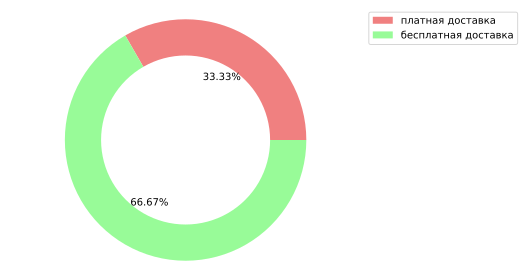

In [9]:
data = [int(len(paid_shipping)), int(len(free_shipping))]
plt.pie(data, labels=['', ''], autopct='%1.2f%%', rotatelabels=True, colors=['#F08080', '#98FB98'], wedgeprops=dict(width=0.3))
plt.axis('equal')
plt.legend(['платная доставка', 'бесплатная доставка'], loc='upper left', bbox_to_anchor=(1.0, 1.0));

**(б) для каждой из категорий из пункта (а) рассчитать долю (в %) магазинов и ресторанов**

In [10]:
# напоминалка 0 - стоимость заказа, 1 - стоимость доставки, 2 - категория заведения
# посмотреть на сформированные словари можно здесь:
# pprint(free_shipping)
# pprint(paid_shipping)
# но мы смотреть на них не будем, а соберём в датафреймы

In [11]:
# с бесплатной доставкой
df_free = pd.DataFrame(data=free_shipping, index=['order_cost', 'cost_of_delivery', 'seller_category']).T
df_free

,order_cost,cost_of_delivery,seller_category
Хинкалофф,740,0,1
GLOBUS,1500,0,5
METRO,1500,0,5
Ашан,1500,0,5
Halal Foods,500,0,5
Season Market,500,0,5
Райский сад,990,0,1
Самокат. Продукты,260,0,3
Чайхона №1,1000,0,1
ХИНКАЛИ ОТ БАБУШКИ НИНО,1400,0,1


In [12]:
# с платной доставкой
df_paid = pd.DataFrame(data=paid_shipping, index=['order_cost', 'cost_of_delivery', 'seller_category']).T
df_paid

,order_cost,cost_of_delivery,seller_category
Лента Гипер,1000,149,5
Утконос ОНЛАЙН,1000,149,5
КуулКлевер,1,99,3
ВкусВилл Экспресс,1,99,3
Бочка,5000,1700,1


In [13]:
# Объединим в один и уберём ненужные нам тройки в seller_category, сделаем их магазинами:
general_df = pd.concat([df_free, df_paid], axis=0)
general_df.loc[general_df.seller_category == 3, 'seller_category'] = 5
general_df

,order_cost,cost_of_delivery,seller_category
Хинкалофф,740,0,1
GLOBUS,1500,0,5
METRO,1500,0,5
Ашан,1500,0,5
Halal Foods,500,0,5
Season Market,500,0,5
Райский сад,990,0,1
Самокат. Продукты,260,0,5
Чайхона №1,1000,0,1
ХИНКАЛИ ОТ БАБУШКИ НИНО,1400,0,1


ну и ниже всякая занимательная статистика

In [14]:
print(f"средняя цена по магазинам = {round(general_df.loc[general_df.seller_category == 5, 'order_cost'].mean(), 2)} р.")
print(f"максимальная цена по магазинам = {round(general_df.loc[general_df.seller_category == 5, 'order_cost'].max(), 2)} р.")
print(f"минимальная цена по магазинам = {round(general_df.loc[general_df.seller_category == 5, 'order_cost'].min(), 2)} р.\n")
print(f"средняя цена по ресторанам = {round(general_df.loc[general_df.seller_category == 1, 'order_cost'].mean(), 2)} р.")
print(f"максимальная цена по ресторанам = {round(general_df.loc[general_df.seller_category == 1, 'order_cost'].max(), 2)} р.")
print(f"минимальная цена по ресторанам = {round(general_df.loc[general_df.seller_category == 1, 'order_cost'].min(), 2)} р.")

средняя цена по магазинам = 776.2 р.
максимальная цена по магазинам = 1500 р.
минимальная цена по магазинам = 1 р.

средняя цена по ресторанам = 1826.0 р.
максимальная цена по ресторанам = 5000 р.
минимальная цена по ресторанам = 740 р.


In [15]:
res_paid = general_df[(general_df.seller_category == 1) & (general_df.cost_of_delivery == 0)].shape[0]
print(f'количество ресторанов с бесплатной доставкой = {res_paid},\nих доля = {np.round(res_paid/general_df.shape[0]*100, 2)}%')
res_free = general_df[(general_df.seller_category == 1) & (general_df.cost_of_delivery > 0)].shape[0]
print(f'количество ресторанов с платной доставкой = {res_free},\nих доля = {np.round(res_free/general_df.shape[0]*100, 2)}%')
shop_paid = general_df[(general_df.seller_category == 5) & (general_df.cost_of_delivery == 0)].shape[0]
print(f'количество магазинов с бесплатной доставкой = {shop_paid},\nих доля = {np.round(shop_paid/general_df.shape[0]*100, 2)}%')
shop_free = general_df[(general_df.seller_category == 5) & (general_df.cost_of_delivery > 0)].shape[0]
print(f'количество магазинов с платной доставкой = {shop_free},\nих доля = {np.round(shop_free/general_df.shape[0]*100, 2)}%')

количество ресторанов с бесплатной доставкой = 4,
их доля = 26.67%
количество ресторанов с платной доставкой = 1,
их доля = 6.67%
количество магазинов с бесплатной доставкой = 6,
их доля = 40.0%
количество магазинов с платной доставкой = 4,
их доля = 26.67%


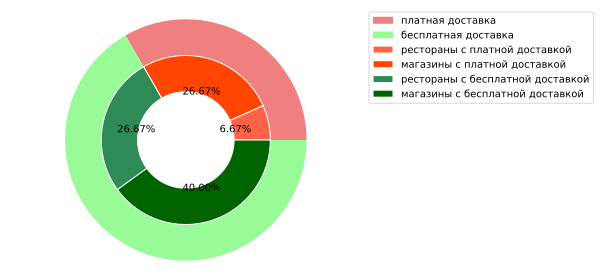

In [16]:
size = 0.3
data = [int(len(paid_shipping)), int(len(free_shipping))]
stat = np.array([[res_free, shop_free], [res_paid, shop_paid]])
plt.pie(data, labels=['', ''], rotatelabels=True, colors=['#F08080', '#98FB98'], wedgeprops=dict(width=0.3))
plt.pie(stat.flatten(), colors=['#FF6347','#FF4500', '#2E8B57', '#006400'], radius=1-size, autopct='%1.2f%%', wedgeprops=dict(width=size, edgecolor='w')) 
plt.legend(['платная доставка', 'бесплатная доставка', 'рестораны с платной доставкой', 'магазины с платной доставкой', 'рестораны с бесплатной доставкой', 'магазины с бесплатной доставкой'], bbox_to_anchor=(1.0, 1.0))
plt.axis('equal');